# Human Activity Recognition Using Machine Learning Model

This notebook details the process of building a machine learning model to classify human activities based on smartphone sensor data. We will explore the dataset, build and evaluate several classification models, and analyze the results to determine the most effective approach for this task.

Our methodology will be as follows:

1.  **Problem Definition:** Clearly stating the problem we aim to solve.
2.  **Data:** Understanding the source and structure of our dataset.
3.  **Evaluation:** Defining the success metric for our models.
4.  **Features:** Exploring the provided features and their relevance.
5.  **Modelling:** Building and training various classification models.
6.  **Experimentation:** Tuning and comparing the models to find the best performer.

---

### 1. Problem Definition

In a statement:
> Given sensor data from a smartphone, can we accurately predict the activity a person is performing?

### 2. Data

The data for this project is the "Human Activity Recognition Using Smartphones" dataset from the UCI Machine Learning Repository. It contains data from a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist.

### 3. Evaluation

> Our goal is to achieve a high accuracy score (ideally above 90%) in classifying the six different activities.

### 4. Features

The dataset provides a 561-feature vector with time and frequency domain variables. The features were extracted from the 3-axial raw signals from the accelerometer and gyroscope sensors.

In [3]:
# Importing all the tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading the data
df = pd.read_csv("Data/train.csv")
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [5]:
df.shape

(7352, 563)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [7]:
df.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


## 1. Data Exploration (Exploratory Data Analysis - EDA)

Now that we've loaded the data, let's explore it to understand its structure, check for issues, and gain insights that will help us in the modeling phase.

* **What questions are we trying to solve?** We want to know if we can use smartphone sensor data to predict human activity.
* **What kind of data do we have?** We have a mix of numerical features, all of which are continuous. The target variable, 'Activity', is categorical.
* **Are there any missing values?** We will check for missing values to ensure our data is clean.
* **Where are the outliers?** We will use boxplots to identify any potential outliers in the features.
* **How can we add, change, or remove features?** We will analyze feature importance later to see if we can simplify our model.

In [8]:
df.isna().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [9]:
df['Activity'].head()

0    STANDING
1    STANDING
2    STANDING
3    STANDING
4    STANDING
Name: Activity, dtype: object

In [10]:
df['Activity'].value_counts()

Activity
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: count, dtype: int64

In [395]:
plt.style.available
plt.style.use("seaborn-v0_8")

### Activity Distribution
The bar chart above shows the distribution of the different activities in our training dataset.


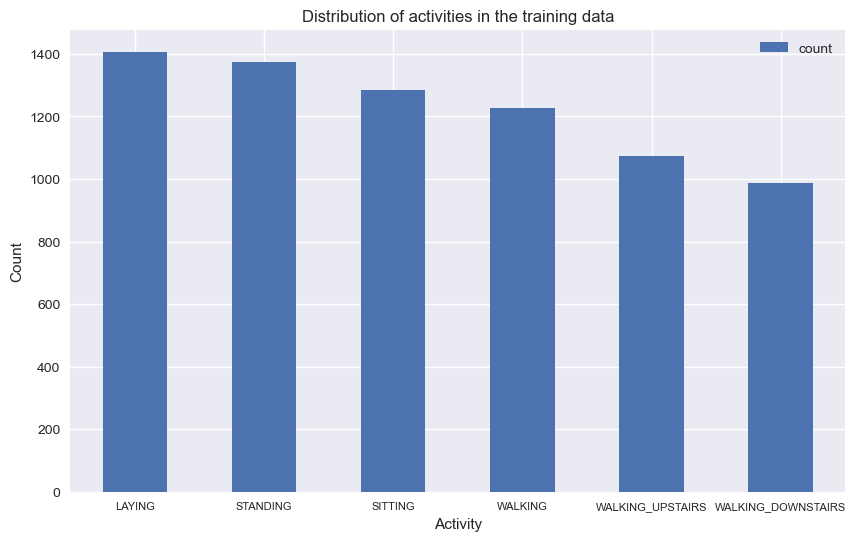

In [14]:
# Distribution of activities in training data
df['Activity'].value_counts().plot(kind = "bar",
    figsize = (10,6))
plt.title("Distribution of activities in the training data")
plt.xlabel("Activity")
plt.ylabel("Count")
plt.legend()
plt.xticks(rotation = 0, fontsize = 8)
plt.show()

**Key Findings:**
* The dataset is fairly balanced across the six activities.
* The static activities (Laying, Standing, Sitting) have slightly more samples than the dynamic activities (Walking, Walking Upstairs, Walking Downstairs). This is a good starting point, as a balanced dataset helps in training an unbiased model.

### Body Acceleration vs. Activity
This boxplot visualizes the distribution of the `tBodyAcc-mean()-X` feature for each activity. 


In [396]:
df["tBodyAcc-mean()-X"].head()

0    0.288585
1    0.278419
2    0.279653
3    0.279174
4    0.276629
Name: tBodyAcc-mean()-X, dtype: float64

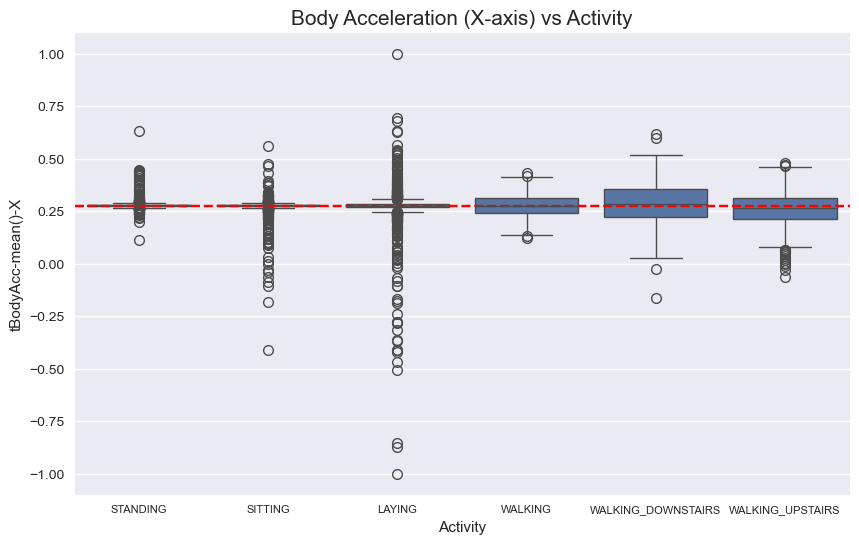

Mean: 0.27448812496352015


In [397]:
# Plot for Accleration of body vs Activity
plt.figure(figsize= (10, 6))
sns.boxplot( x = "Activity", y = "tBodyAcc-mean()-X", data = df)
plt.xticks(fontsize = 8)
plt.show()
print(f"Mean: {df['tBodyAcc-mean()-X'].mean()}")

**Key Findings:**
* There's a clear distinction between static activities (Laying, Sitting, Standing) and dynamic activities (Walking, Walking Upstairs, Walking Downstairs).
* The static activities have a much smaller variance and are clustered around a mean close to the overall average.
* The dynamic activities show a wider range of values, which is expected as the body is in motion.
* This feature appears to be a strong indicator for distinguishing between static and dynamic movements.

### Gravity Acceleration vs. Activity
This boxplot shows the `tGravityAcc-mean()-Y` feature for each activity.

In [398]:
df["tGravityAcc-mean()-Y"].head()

0   -0.140840
1   -0.141551
2   -0.142010
3   -0.143976
4   -0.148750
Name: tGravityAcc-mean()-Y, dtype: float64

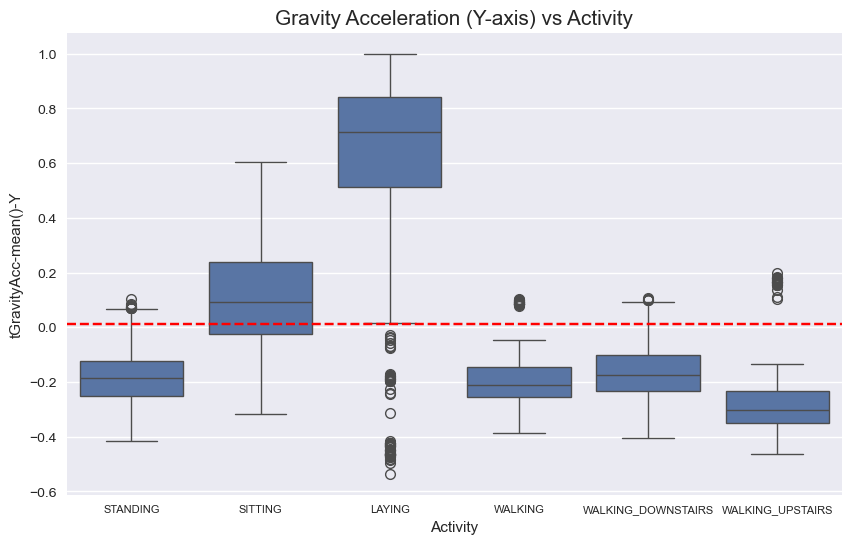

In [18]:
# Plot for gravity vs Activity
plt.figure(figsize = (10, 6))
sns.boxplot(x = "Activity", y = "tGravityAcc-mean()-Y", data = df)
plt.title("Gravity Acceleration (Y-axis) vs Activity", fontsize="15")
plt.xticks(fontsize=8)
plt.axhline(df["tGravityAcc-mean()-Y"].mean(), c = 'r', linestyle = '--')
plt.show()

**Key Findings:**
* This feature is particularly effective at separating `WALKING_UPSTAIRS` and `WALKING_DOWNSTAIRS`. The distributions for these two activities have very little overlap.
* The static activities (Laying, Sitting, Standing) also show distinct patterns in their gravity acceleration on the Y-axis.
* A machine learning model should be able to leverage this feature to effectively distinguish between several of the activities..

### Body gyroscpoe mean vs. Activity
This boxplot shows the `tGravityAcc-mean()-Y` feature for each activity.

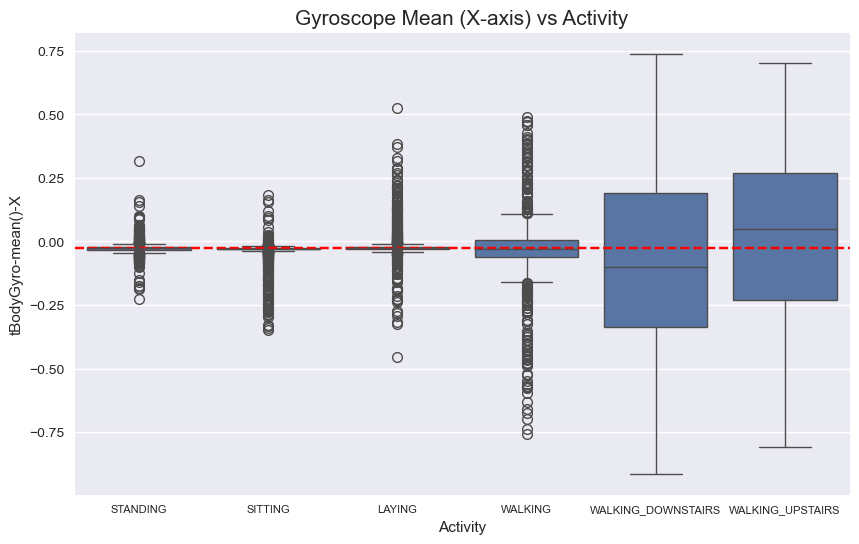

In [19]:
# Plot for Gyro mean vs Activity
plt.figure(figsize = (10, 6))
sns.boxplot(x = "Activity", y = "tGravityAcc-mean()-Y", data = df)
plt.title("Gyroscope Mean (X-axis) vs Activity", fontsize="15")
plt.xticks(fontsize=8)
plt.axhline(df["tBodyGyro-mean()-X"].mean(), c = 'r', linestyle = '--')
plt.show()

**Key Findings**

* As we can see, the rotational velocity for all three static activities is tightly clustered around zero.
*  The dynamic activities show much more variance, it confirms that the gyroscope data is very useful for separating static from dynamic motion.

### t-SNE Visualization

The t-SNE plot above visualizes the high-dimensional (561 features) dataset in a 2D space. Each color represents a different activity.

In [21]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
X_sample = df.drop(['Activity'], axis=1)
y_sample = df['Activity']

scaler = StandardScaler()

# Scale the sample
X_sample_scaled = scaler.fit_transform(X_sample)

# n_components=2: Because we wanted to create a 2D-plot
tsne = TSNE(n_components = 2,  perplexity=40)
tsne_results = tsne.fit_transform(X_sample_scaled)

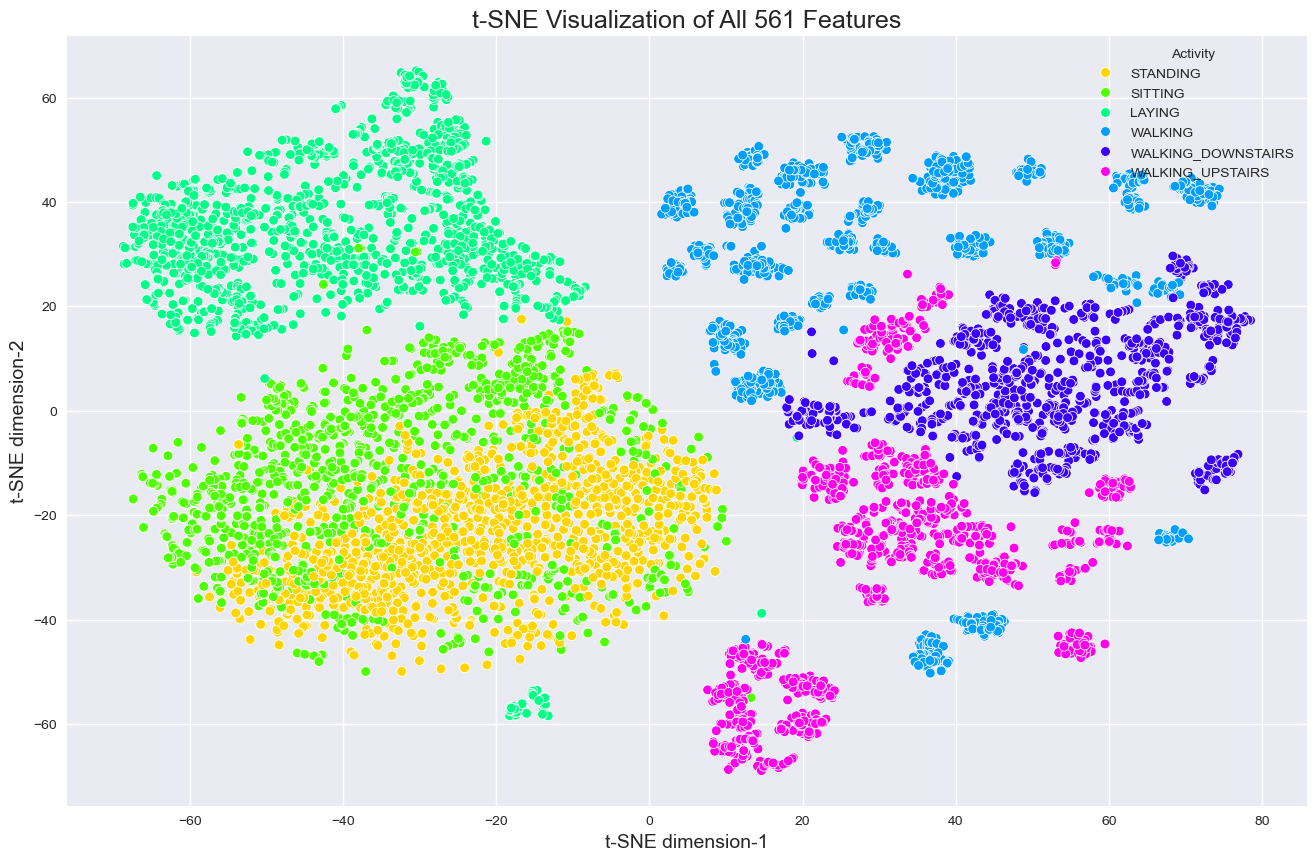

In [416]:
# Now plot the scatter plot
plt.figure(figsize = (16,10))
sns.scatterplot(x=tsne_results[:, 0],
               y = tsne_results[:, 1],
               hue = y_sample,
               palette = sns.color_palette("hsv", 6),
               legend = "full",
               )

plt.title("t-SNE Visualization of All 561 Features", fontsize = 18)
plt.xlabel("t-SNE dimension-1", fontsize = 14)
plt.ylabel("t-SNE dimension-2", fontsize = 14)
plt.legend(title = "Activity", loc='upper right')
plt.grid(True)
plt.savefig("TSNE visualization of all features HAR")
plt.show();

**Key findings**

* The activities form distinct, well-separated clusters. This is the best possible outcome and is strong evidence that a machine learning model will be able to learn the boundaries between the different activities.

* The `SITTING` and `STANDING` activites clusters are very close, which confirms out early hypothesis that these two activities will be hardest to distinguish.

## 2. Data Preprocessing

Before we can train our models, we need to preprocess the data. This involves two key steps:

1.  **Label Encoding:** Our target variable, 'Activity', is categorical (e.g., 'WALKING', 'SITTING'). Machine learning models require numerical input, so we will use `LabelEncoder` to convert these activity names into numbers.

2.  **Feature Scaling:** The features in our dataset have different scales and ranges. To ensure that all features contribute equally to the model's training and to help the algorithms converge faster, we will scale the data using `StandardScaler`. This will transform the data so that it has a mean of 0 and a standard deviation of 1.

In [ ]:
train_df = pd.read_csv("Data/train.csv") 
test_df = pd.read_csv("Data/test.csv")

In [399]:
y_train = train_df["Activity"]
y_test = test_df["Activity"]
y_train.head()

0    STANDING
1    STANDING
2    STANDING
3    STANDING
4    STANDING
Name: Activity, dtype: object

#### Label Encoding

In [183]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
# For training data
label_enc = LabelEncoder()
y_train_transformed = label_enc.fit_transform(y_train)
y_train_transformed

array([2, 2, 2, ..., 5, 5, 5], shape=(7352,))

In [185]:
# For test data
y_test_transformed = label_enc.fit_transform(y_test)
y_test_transformed

array([2, 2, 2, ..., 5, 5, 5], shape=(2947,))

In [404]:
X_train = train_df.drop((["subject", "Activity"]),axis = 1)
X_test = test_df.drop((["subject", "Activity"]), axis = 1)
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [401]:
X_test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857


#### Feature Scaling

In [417]:
# Now we'll apply feature scaling to all transform the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [407]:
# Create a new dataframe to view the scaled data
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_train_scaled_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.200642,-0.063683,-0.419628,-0.868814,-0.939441,-0.737529,-0.859817,-0.939019,-0.766437,-0.856036,...,-0.795359,0.025960,-0.276399,-0.360603,0.062940,-0.778427,-0.026080,-0.687219,0.407946,-0.007568
1,0.055948,0.031486,-0.253908,-0.875426,-0.923902,-0.849304,-0.868531,-0.921998,-0.848928,-0.871359,...,0.130614,-0.897357,-0.767990,0.133011,-0.021461,-1.218805,1.484470,-0.694138,0.409117,0.007875
2,0.073515,-0.043416,-0.076295,-0.869039,-0.907760,-0.893785,-0.863137,-0.898854,-0.896701,-0.863323,...,1.152336,-0.260878,-0.438316,-0.377840,0.391976,0.151207,1.704201,-0.702239,0.410288,0.026502
3,0.066696,-0.208422,-0.249712,-0.870626,-0.940022,-0.921805,-0.864503,-0.938124,-0.925279,-0.863323,...,1.112769,0.591045,0.463155,-0.135025,-0.033637,1.037851,-1.003019,-0.701684,0.414650,0.031714
4,0.030469,0.027587,-0.109848,-0.875188,-0.934878,-0.921343,-0.867384,-0.931789,-0.928028,-0.870260,...,-0.149577,-0.138515,-0.240313,0.340406,0.268486,1.125918,-1.276282,-0.700152,0.425463,0.045225


### Principal Component Analysis (PCA)

>Before training our final models, let's explore dimensionality reduction using Principal Component Analysis (PCA). Our dataset has 561 features, and while this provides a lot of information, some of these features might be redundant or correlated. PCA helps us reduce the number of features while retaining most of the important information (variance) from the original dataset.

In [217]:
from sklearn.decomposition import PCA

np.random.seed(42)
# Initialise PCA, telling it to keep 95% of varience
pca = PCA(n_components = 0.95)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [218]:
X_test_pca.shape

(2947, 102)

In [219]:
X_train_pca.shape
# Here the features are reduced from 561 to 102

(7352, 102)

## 3. Modelling

Now that we've explored the data, it's time to build and train our machine learning models. We will try a few different classification algorithms to see which one performs best on this dataset.

We will use the following models:
* Logistic Regression
* K-Nearest Neighbors
* Random Forest Classifier

For each model, we will:
* Train the model on the training data.
* Make predictions on the test data.
* Evaluate the model's performance using accuracy score, confusion matrix, cv_score and a classification report.

In [409]:
pd.DataFrame(X_train_scaled).describe().T.head(5)

,count,mean,std,min,25%,50%,75%,max
0,7352.0,-3.131336e-16,1.000068,-18.140487,-0.163869,0.038505,0.198885,10.326608
1,7352.0,4.783986e-17,1.000068,-24.071521,-0.175643,0.011671,0.169391,24.938779
2,7352.0,8.698156e-17,1.000068,-15.730849,-0.209280,0.008207,0.200374,19.585288
3,7352.0,-1.507680e-16,1.000068,-0.879336,-0.863187,-0.759427,0.808163,3.577947
4,7352.0,0.000000e+00,1.000068,-0.972792,-0.929530,-0.678376,0.948462,2.839526


In [410]:
# Reusable Evaluation Function

def evaluate_my_model(model, model_name, X_train, y_train, X_test, y_test):
    """
    Performs a complete model evaluation based on the provided code snippet.
    
    Args:
        model: The trained scikit-learn model.
        model_name (str): Name of the model string.
        X_train: Training features.
        y_train: Training labels.
        X_test: Test features.
        y_test: Test labels.
    """
    print(f"--- Evaluating Model: {model_name}---")
    
    # Calculate and print the training score
    train_score = model.score(X_train, y_train)
    print(f"\nTraining Score: {train_score:.4f}")
    
    # Make predictions on the test set
    predictions = model.predict(X_test)
    
    # Calculate and print the test accuracy
    accuracy = accuracy_score(y_test, predictions)
    print(f"\nTest Accuracy: {accuracy * 100:.2f}%")
    
    # Print the classification report
    print("\nClassification Report:")
    print(classification_report(y_test, predictions))
    
    # Calculate and print the cross-validation score
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"\nMean Cross-Validation Accuracy: {cv_scores.mean():.4f}\n")
    
    # Create, display, and save the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(12, 8))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Prediction")
    plt.ylabel("True")
    
    # Save the figure before showing it
    plt.savefig(f"Confusion_Matrix_{model_name.replace(' ', '_')}.png")
    plt.show()

    print('\n')

#### 1. `LogisticRegression()`  -  Baseline model.

In [379]:
# Training the baseline model: LinearRegression
from sklearn.linear_model import LogisticRegression

np.random.seed(42)

lr_model = LogisticRegression(max_iter= 3000,
                             solver = 'lbfgs')

# Fitting the model with pca training data
lr_model.fit(X_train_pca, y_train_transformed)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,3000
,multi_class,'deprecated'


--- Evaluating Model: Logistic Regression model---

Training Score: 0.9829

Test Accuracy: 93.86%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.89      0.92      0.90       491
           2       0.93      0.90      0.91       532
           3       0.96      0.95      0.96       496
           4       0.92      0.94      0.93       420
           5       0.93      0.92      0.93       471

    accuracy                           0.94      2947
   macro avg       0.94      0.94      0.94      2947
weighted avg       0.94      0.94      0.94      2947


Mean Cross-Validation Accuracy: 0.9219



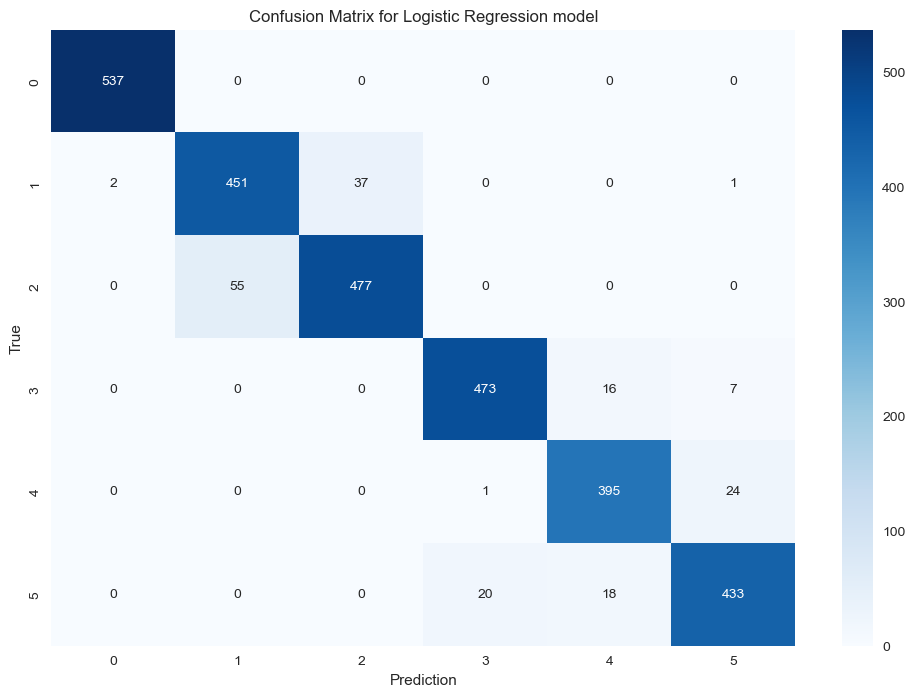

In [411]:
# Evaluating Logistic Regression model
evaluate_my_model(lr_model, 
                 "Logistic Regression model",
                 X_train_pca,
                 y_train_transformed,
                 X_test_pca,
                 y_test_transformed)


#### 2. `RadomForestCassifier()` - Advance model

In [249]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
rf_model = RandomForestClassifier()

rf_model.fit(X_train_pca, y_train_transformed)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


--- Evaluating Model: Random Forest Regression model---

Training Score: 1.0000

Test Accuracy: 89.14%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       537
           1       0.86      0.81      0.83       491
           2       0.84      0.91      0.87       532
           3       0.87      0.93      0.90       496
           4       0.89      0.78      0.83       420
           5       0.90      0.93      0.91       471

    accuracy                           0.89      2947
   macro avg       0.89      0.89      0.89      2947
weighted avg       0.89      0.89      0.89      2947


Mean Cross-Validation Accuracy: 0.8584



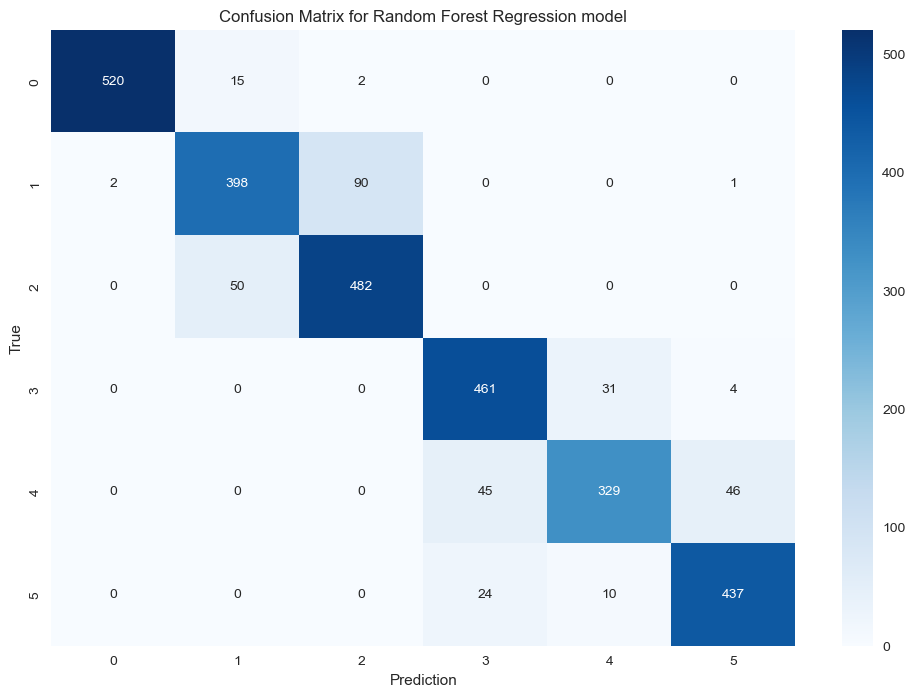

In [389]:
# Evaluating Random forest Classification model
evaluate_my_model(rf_model, 
                 "Random Forest Regression model",
                 X_train_pca,
                 y_train_transformed,
                 X_test_pca,
                 y_test_transformed)

So, till here we figured out that `LogisticRegression` model is more accurate than the `RandomForestClassifier` model.

>Therefore, next we'll try to tune the hyperparameter of both the models to make the predictions more accurate.

## 4. Hyperparameter Tuning


#### 1. Tuning `LogisticRegression()` model


##### Hyperparameter Tuning with `GridSearchCV`

While our initial models performed well, we can often improve performance by tuning their hyperparameters. These are the settings that we, the data scientists, provide to the model. We will use `GridSearchCV` to systematically test a range of hyperparameters for our Logistic Regression model to find the combination that yields the best performance.

`GridSearchCV` will use 5-fold cross-validation to evaluate each combination and identify the best-performing set of parameters.

In [267]:
from sklearn.model_selection import GridSearchCV

np.random.seed(42)

# Parameter grid
param_grid = {
    'C' : [0.01, 0.1, 1, 10, 100],
    'solver' : ['lbfgs', 'saga'],
    'penalty' : ['l2'],
    'class_weight' : [None, 'balanced'],
    'max_iter' : [3000]
}

# grid search setup 
grid_search = GridSearchCV(
                        estimator = lr_model,
                        param_grid = param_grid,
                        cv = 5,
                        verbose =1,
                        n_jobs = -1)

grid_search.fit(X_train_pca, y_train_transformed)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,LogisticRegre...max_iter=3000)
,param_grid,"{'C': [0.01, 0.1, ...], 'class_weight': [None, 'balanced'], 'max_iter': [3000], 'penalty': ['l2'], ...}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [269]:
grid_search.best_params_

{'C': 1,
 'class_weight': 'balanced',
 'max_iter': 3000,
 'penalty': 'l2',
 'solver': 'lbfgs'}

> Now, we know  the best parameters, so we'll now train thew model on these parameters to  get the best output

In [274]:
# Training the LogisticRegression model on best parameters

np.random.seed(42)

lr_model_tuned = LogisticRegression(
    C = 1,
    class_weight = 'balanced',
    max_iter = 3000,
    penalty = 'l2',
    solver = 'lbfgs'
)

lr_model_tuned.fit(X_train_pca, y_train_transformed)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,3000
,multi_class,'deprecated'


--- Evaluating Model: Logistic Regression tuned model---

Training Score: 0.9831

Test Accuracy: 93.76%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.89      0.92      0.90       491
           2       0.93      0.89      0.91       532
           3       0.96      0.95      0.95       496
           4       0.92      0.94      0.93       420
           5       0.93      0.92      0.93       471

    accuracy                           0.94      2947
   macro avg       0.94      0.94      0.94      2947
weighted avg       0.94      0.94      0.94      2947


Mean Cross-Validation Accuracy: 0.9214



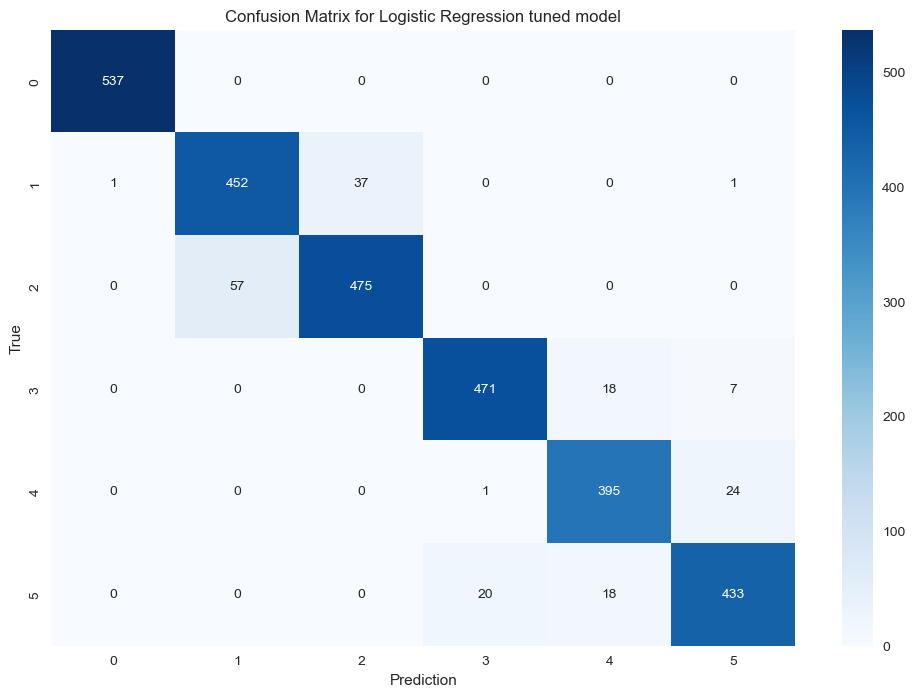

In [390]:
# Evaluating Logistic Regression Tuned model
evaluate_my_model(lr_model_tuned, 
                 "Logistic Regression tuned model",
                 X_train_pca,
                 y_train_transformed,
                 X_test_pca,
                 y_test_transformed)


**Key Findings:**

* After running the grid search, the best accuracy achieved was approximately **93.76%**.
* The optimal hyperparameters found by `GridSearchCV` were **`C=1`** and **`penalty='l2'`**. This tells us that an L2 regularization penalty with this specific strength provides the best results for our model on this dataset, helping it generalize better to new, unseen data.

#### 2. Tuning the `RandomForestClassifier()` model

##### Hyperparameter Tuning for Random Forest Classifier

To further optimize our predictions, we will also tune the hyperparameters for our Random Forest model. Random Forest has many tunable parameters that can significantly impact its performance. We will use `GridSearchCV` to explore a wide range of settings and find the optimal combination for this specific problem.

We will focus on tuning the following key hyperparameters:
* `n_estimators`: The number of trees in the forest.
* `max_depth`: The maximum depth of each tree.
* `min_samples_split`: The minimum number of samples required to split an internal node.
* `min_samples_leaf`: The minimum number of samples required to be at a leaf node.
* `max_features`: The number of features to consider when looking for the best split.
* `bootstrap`: Whether bootstrap samples are used when building trees.

In [270]:
# RandomForestClassifier parameter tuning
np.random.seed(42)

# Parameter grid
param_grid = {
    'n_estimators' : [100, 200, 300],
    'max_depth' : [None, 10, 20],
    'min_samples_split' : [2, 5],
    'min_samples_leaf' :[1,2],
    'max_features' : ['sqrt', 'log2'],
    'bootstrap' : [True, False] 
}

# grid search setup
grid_search = GridSearchCV(
    estimator = rf_model,
    param_grid = param_grid,
    cv = 5,
    verbose = 1,
    n_jobs = -1
)

grid_search.fit(X_train_pca, y_train_transformed)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


,estimator,RandomForestClassifier()
,param_grid,"{'bootstrap': [True, False], 'max_depth': [None, 10, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2], ...}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [271]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 200}

In [283]:
# Training the RandomForestClassifier on best parameters

np.random.seed(42)

rf_model_tuned = RandomForestClassifier(
             bootstrap =  False,
             max_depth = None,
             max_features = 'log2',
             min_samples_leaf = 2,
             min_samples_split = 5,
             n_estimators = 200
)

rf_model_tuned.fit(X_train_pca, y_train_transformed)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'log2'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False


--- Evaluating Model: RandomForestClassification Tuned model---

Training Score: 1.0000

Test Accuracy: 90.57%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       537
           1       0.88      0.82      0.85       491
           2       0.86      0.93      0.89       532
           3       0.91      0.93      0.92       496
           4       0.87      0.84      0.86       420
           5       0.91      0.93      0.92       471

    accuracy                           0.91      2947
   macro avg       0.90      0.90      0.90      2947
weighted avg       0.91      0.91      0.91      2947


Mean Cross-Validation Accuracy: 0.8668



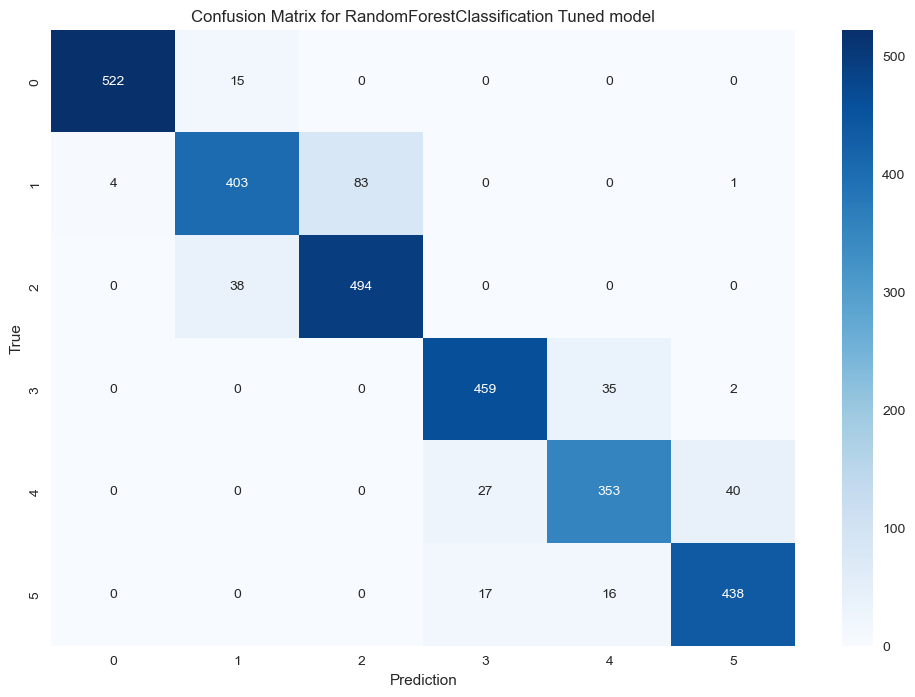

In [391]:
# Evaluating Random forest Classification tuned model
evaluate_my_model(rf_model_tuned, 
                 "RandomForestClassification Tuned model",
                 X_train_pca,
                 y_train_transformed,
                 X_test_pca,
                 y_test_transformed)

**Key Findings**
  
* After running the grid search, the best accuracy achieved was approximately **90.57%**.
* The optimal parameters for the Random Forest model were found.
* The best configuration is to use **200 trees** (`n_estimators`), with no maximum depth, using the `log2` of the total features at each split. It also specifies not to use bootstrapping (`bootstrap: False`) and sets specific thresholds for splitting and leaf nodes.
* These parameters represent the combination that yielded the highest cross-validated accuracy during the grid search, giving us the most optimized version of the Random Forest model for this dataset.

## 5. Experimentation: XGBoost and Advanced Tuning

To push the performance of our predictions even further, we will now introduce a more powerful and sophisticated model: **XGBoost (Extreme Gradient Boosting)**. XGBoost is a highly efficient implementation of gradient boosting and is well-known for its performance in machine learning competitions.

Our process with XGBoost will be as follows:
1.  Train a baseline XGBoost model on the PCA-transformed data to establish its initial performance.
2.  Conduct two-stage hyperparameter tuning process to find the optimal model configuration.
3.  Train a final, tuned XGBoost model using the best parameters found.
4.  Evaluate the final model to see the impact of our tuning efforts.


In [322]:
from xgboost import XGBClassifier

np.random.seed(42)
xgb_model = XGBClassifier(eval_metric='mlogloss')

xgb_model.fit(X_train_pca, y_train_transformed)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'mlogloss'


--- Evaluating Model: XGBoost Classifier model---

Training Score: 1.0000

Test Accuracy: 92.50%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       537
           1       0.90      0.88      0.89       491
           2       0.89      0.93      0.91       532
           3       0.92      0.95      0.93       496
           4       0.92      0.84      0.88       420
           5       0.92      0.96      0.94       471

    accuracy                           0.93      2947
   macro avg       0.92      0.92      0.92      2947
weighted avg       0.93      0.93      0.92      2947


Mean Cross-Validation Accuracy: 0.8753



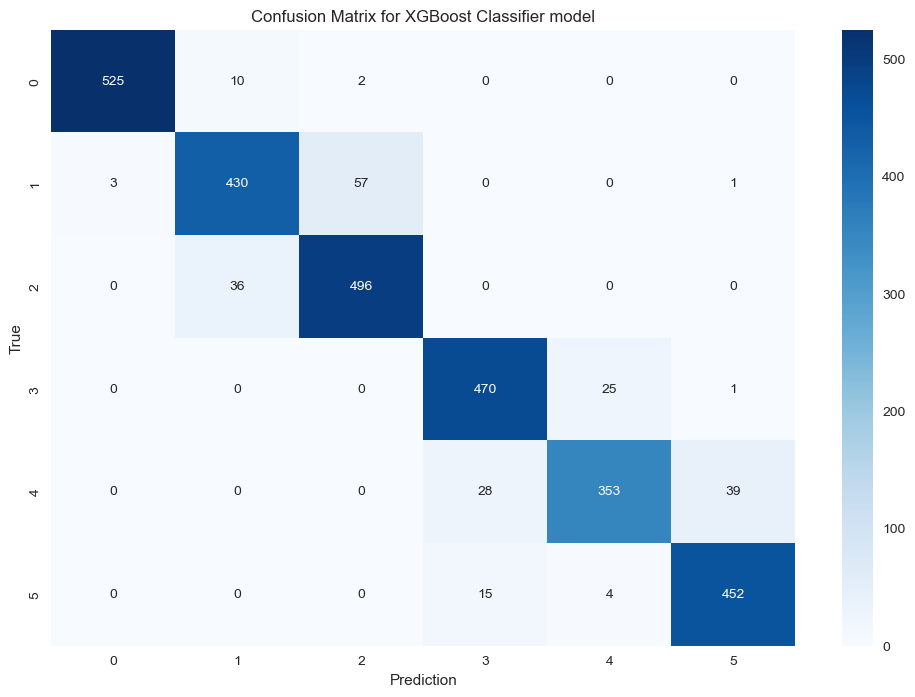

In [392]:
# Evaluating XG Boost Classifier model
evaluate_my_model(xgb_model, 
                 "XGBoost Classifier model",
                 X_train_pca,
                 y_train_transformed,
                 X_test_pca,
                 y_test_transformed)

#### Tuning `XGBClassifier` model
##### 1. `RandomizedSearchCV`

In [307]:
# Now i'll find the best parameters for this model
from sklearn.model_selection import RandomizedSearchCV

np.random.seed(42)
param_distributions = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0.5, 1, 1.5, 2],             # L2 regularization
    
}

# Setting up grid search
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_distributions,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1,
    n_iter = 200
)

random_search.fit(X_train_pca, y_train_transformed)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


,estimator,"XGBClassifier...ree=None, ...)"
,param_distributions,"{'colsample_bytree': [0.6, 0.8, ...], 'gamma': [0, 1, ...], 'learning_rate': [0.01, 0.05, ...], 'max_depth': [3, 5, ...], ...}"
,n_iter,200
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [321]:
random_search.best_params_

{'subsample': 0.6,
 'reg_lambda': 1.5,
 'reg_alpha': 0,
 'n_estimators': 500,
 'max_depth': 3,
 'learning_rate': 0.2,
 'gamma': 0,
 'colsample_bytree': 0.6}

##### 2. `GridSearchCV`

In [327]:
# Now we'll apply Grid Search to find the best params among them
np.random.seed(42)
param_grid = {
    
    'learning_rate': [0.15, 0.2, 0.25],  
    'n_estimators': [450, 500, 550],     
    'subsample': [0.6],                  
    'colsample_bytree': [0.6],           
    'reg_lambda': [1.0, 1.5, 2.0],       
    'reg_alpha': [0, 0.1],               
    'max_depth': [3],                    
    'gamma': [0, 0.1]    
}

# Setting up grid search
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train_pca, y_train_transformed)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'colsample_bytree': [0.6], 'gamma': [0, 0.1], 'learning_rate': [0.15, 0.2, ...], 'max_depth': [3], ...}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'multi:softprob'


In [328]:
grid_search.best_params_

{'colsample_bytree': 0.6,
 'gamma': 0,
 'learning_rate': 0.25,
 'max_depth': 3,
 'n_estimators': 550,
 'reg_alpha': 0,
 'reg_lambda': 1.5,
 'subsample': 0.6}

In [421]:
# Fitting the model with the best parameters
np.random.seed(42)

xgb_model_tuned = XGBClassifier(
             colsample_bytree = 0.6,
             gamma = 0,
             learning_rate = 0.25,
             max_depth = 3,
             n_estimators = 550,
             reg_alpha = 0,
             reg_lambda = 1.5,
             subsample = 0.6
)

xgb_model_tuned.fit(X_train_pca, y_train_transformed)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.6
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


--- Evaluating Model: XGBoost Classifier tuned model---

Training Score: 1.0000

Test Accuracy: 94.16%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       537
           1       0.91      0.89      0.90       491
           2       0.90      0.92      0.91       532
           3       0.96      0.97      0.96       496
           4       0.95      0.90      0.93       420
           5       0.93      0.97      0.95       471

    accuracy                           0.94      2947
   macro avg       0.94      0.94      0.94      2947
weighted avg       0.94      0.94      0.94      2947


Mean Cross-Validation Accuracy: 0.8996



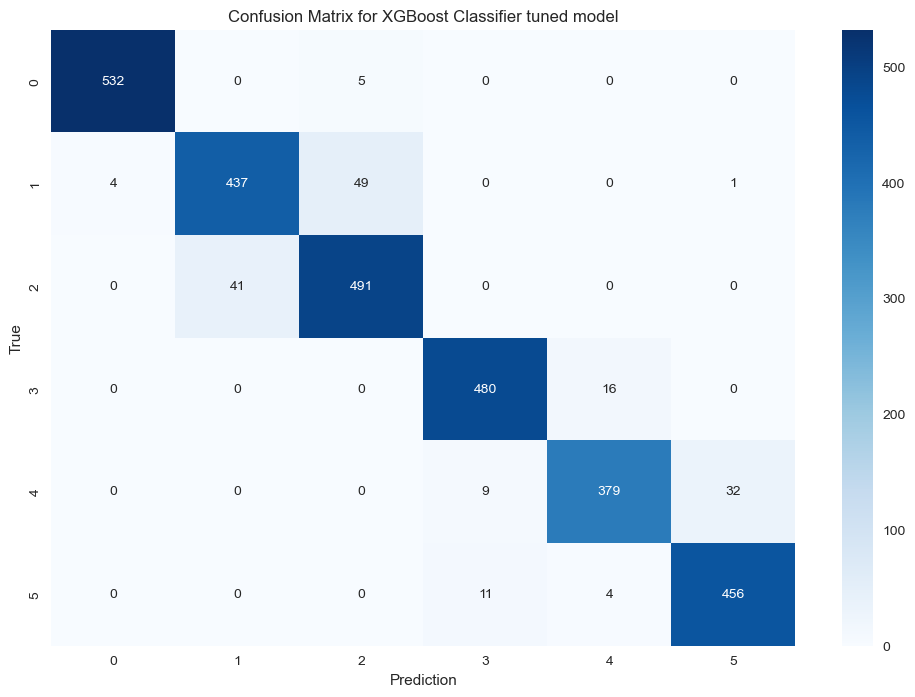

In [422]:
# Evaluating XG Boost Classifier model
evaluate_my_model(xgb_model_tuned, 
                 "XGBoost Classifier tuned model",
                 X_train_pca,
                 y_train_transformed,
                 X_test_pca,
                 y_test_transformed)

## 6. Model Performance Comparison

| Model                          | Train Score | Test Accuracy | CV Score | Precision (Macro Avg) | Recall (Macro Avg) | F1-Score (Macro Avg) | Notes |
|--------------------------------|-------------|---------------|----------|----------------------|------------------|--------------------|-------|
| Logistic Regression (Base)     | 0.9829      | 93.86%        | 0.9219   | 0.94                 | 0.94             | 0.94               | Best overall performance, strong generalization |
| Random Forest (Base)           | 1.0000      | 89.14%        | 0.8573   | 0.89                 | 0.89             | 0.89               | Overfits (perfect train score, lower test/CV) |
| Logistic Regression (Tuned)    | 0.9831      | 93.76%        | 0.8584   | 0.94                 | 0.94             | 0.94               | Similar to base LR, CV dropped slightly |
| Random Forest (Tuned)          | 1.0000      | 90.57%        | 0.8535   | 0.90                 | 0.90             | 0.90               | Slightly better than base RF, still overfitting |
| XGBoost (Base)                 | 1.0000      | 92.50%        | 0.8753   | 0.92                 | 0.92             | 0.92               | Strong performance, minor overfitting |
| XGBoost (Tuned)                | 1.0000      | 94.16%        | 0.8996   | 0.94                 | 0.94             | 0.94               | Best overall accuracy, improved CV score |

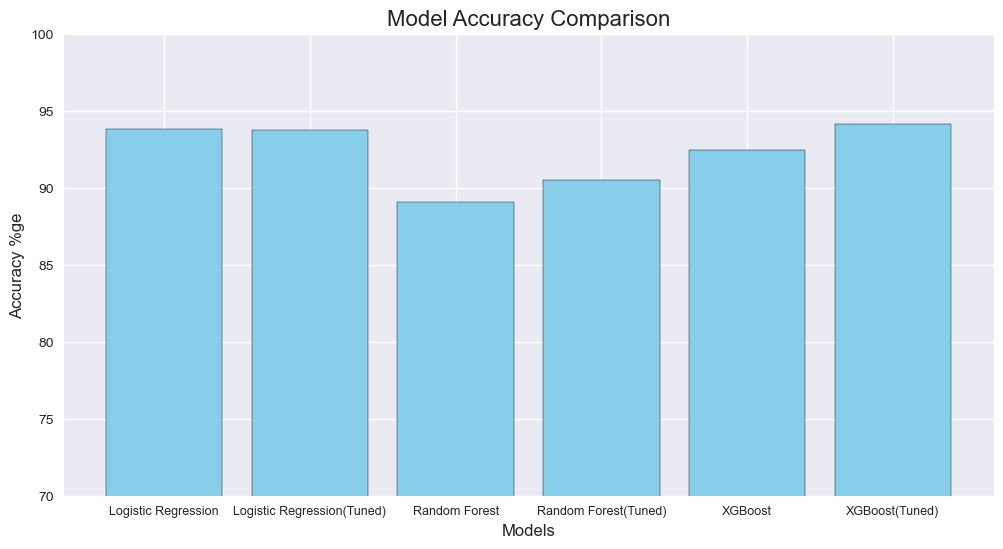

In [445]:
# Model Comparison graph
models = ['Logistic Regression','Logistic Regression(Tuned)', 'Random Forest',  'Random Forest(Tuned)', 'XGBoost', 'XGBoost(Tuned)']
accuracy = [93.86,93.76, 89.14,  90.57, 92.50, 94.16] 
plt.figure(figsize=(12,6))
plt.bar(models, accuracy, color='skyblue', edgecolor='black')
plt.ylim(70, 100)  # zoom in to highlight differences
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy %ge', fontsize=12)
plt.xticks(fontsize = 9)
plt.show()

So, we've got our best model for this problem `XGBClassifier() - Tuned` which is giving **94.16%** accuracy.

## 7. Feature Importance

Take idea from : https://www.geeksforgeeks.org/machine-learning/feature-importance-with-random-forests/

While our models provide accurate predictions, it's also valuable to understand *which* features are the most influential in making those predictions. By training a Random Forest Classifier on the full, scaled dataset, we can extract and visualize the importance of each of the 561 features.

In [355]:
# Most important features
rf_feature = RandomForestClassifier()
rf_feature.fit(X_train_scaled, y_train_transformed)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


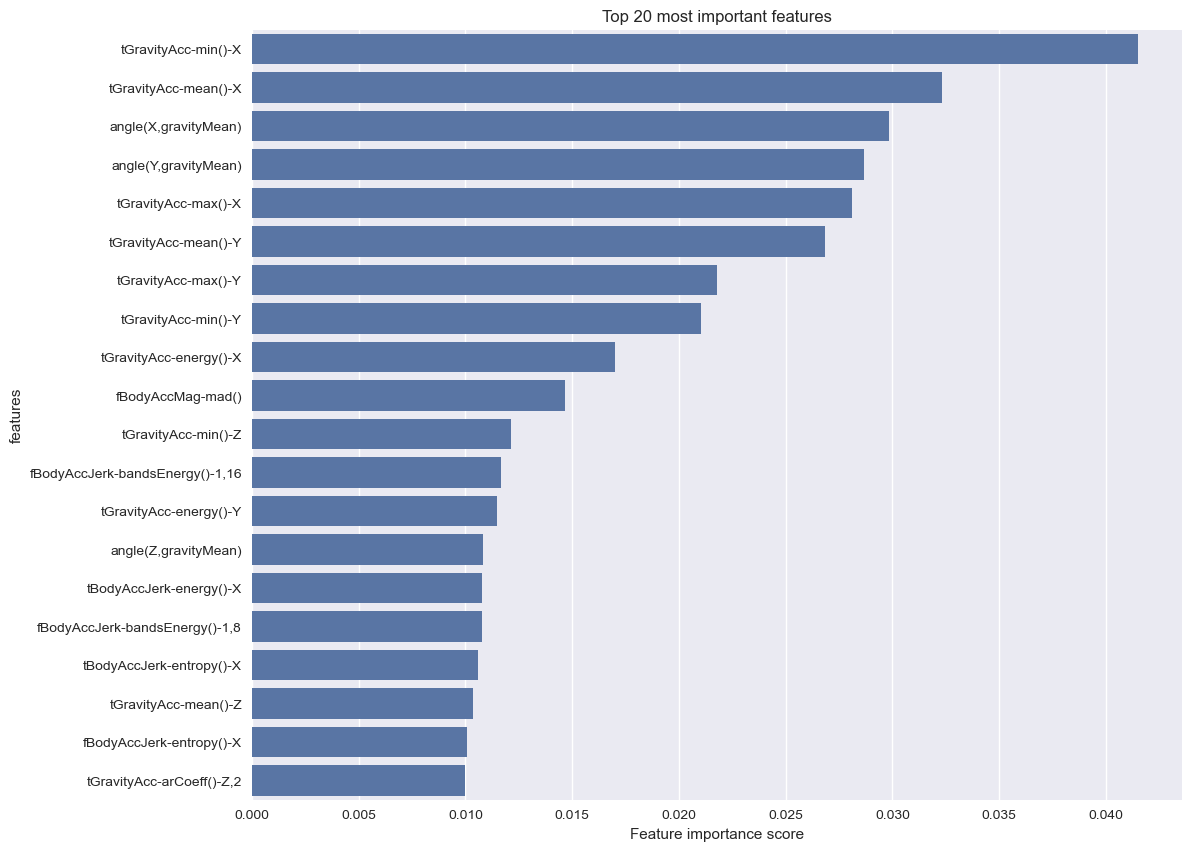

In [377]:
# Create a series for easy plotting 
importances = pd.Series(
    rf_feature.feature_importances_,
    index = X_train.columns)

# Get the top 20 features
top_20_features = importances.nlargest(20)

plt.figure(figsize = (12, 10))
sns.barplot(x=top_20_features.values, y=top_20_features.index, legend = False)
plt.title("Top 20 most important features")
plt.xlabel("Feature importance score")
plt.ylabel("features")
plt.savefig('Feature_Importance_plot.png')
plt.show()

In [414]:
print("\n--- Top 5 Most Important Features ---")
print(top_20_features.head())


--- Top 5 Most Important Features ---
tGravityAcc-min()-X     0.041489
tGravityAcc-mean()-X    0.032343
angle(X,gravityMean)    0.029841
angle(Y,gravityMean)    0.028685
tGravityAcc-max()-X     0.028106
dtype: float64


**Key Findings:**

* **Gravity's Dominance:** The analysis overwhelmingly shows that features related to gravity acceleration (`tGravityAcc`) are the most critical for distinguishing between activities. The top 5 features are all related to gravity measurements or the angle of the device relative to gravity.
* **Key Predictors:** Specifically, `tGravityAcc-min()-X` and `tGravityAcc-mean()-X` are the two most important features. This makes physical sense, as the phone's orientation and acceleration along the X-axis (relative to the waist) are strong indicators of whether a person is standing, sitting, lying down, or moving.
* **Static vs. Dynamic Separation:** The high importance of gravity-related features explains why the models are so effective at separating static activities (Sitting, Standing, Laying) from dynamic ones (Walking). The phone's interaction with the constant force of gravity provides a very clear signal for these different states.








In [446]:
# Saving the model
import joblib
joblib.dump(xgb_model_tuned, "HAR-model.pkl")

['HAR-model.pkl']

In [447]:
# Saving the standard scaler
joblib.dump(scaler, "scaler.pkl")

# Saving the PCA
joblib.dump(pca, "pca.pkl")

# Saving the Label Encoder
joblib.dump(label_enc, "label_encoder.pkl")

['label_encoder.pkl']

## Conclusion
After evaluating all models, the **`tuned XGBoost classifier` emerges as the top-performing model**, achieving the highest test accuracy of **94.16%**. The extensive, multi-stage hyperparameter tuning process successfully improved its generalization capabilities compared to the baseline version, resulting in the best overall performance.

It is also worth noting that the **baseline `Logistic Regression` model** performed exceptionally well, achieving a very close **93.86% accuracy** with strong generalization and without any tuning. It stands as a powerful and simpler alternative.

Random Forest model, showed a tendency to overfit the training data. While tuning helped, they did not surpass the performance of XGBoost or Logistic Regression.

Ultimately, this project successfully demonstrates that smartphone sensor data can be used to predict human activity with a high degree of accuracy. **The final recommendation is to use the tuned XGBoost model for the highest predictive power.**